# Introduction to feed-forward neural networks

---

### Lecture: "Physics-augmented machine learning" @ Cyber-Physical Simulation, TU Darmstadt
### Lecturer: Prof. Oliver Weeger
### Content creators: Dominik K. Klein, Jasper O. Schommartz
### Summer term 2024

---


### In this notebook, you learn...


*   Learning goal 1
*   Learning goal 2






### README

In [ ]:
!git clone https://github.com/klein-tu-da/PAML_test.git

## Task 1: Nonlinear regression

## Task 2: Convex and monotonous neural networks

## Import modules

In [2]:
import tensorflow as tf
import datetime
now = datetime.datetime.now
import PAML_test.FFNN_introduction.data as ld
import PAML_test.FFNN_introduction.models as lm
import PAML_test.FFNN_introduction.plots as lp

## Load and calibrate model

Show figures of activation functions and data. Define variables here.


2024-04-15 12:20:08.923134
Epoch 1/100
13/13 - 2s - loss: 36.3073 - 2s/epoch - 144ms/step
Epoch 2/100
13/13 - 0s - loss: 22.7819 - 38ms/epoch - 3ms/step
Epoch 3/100
13/13 - 0s - loss: 13.5976 - 41ms/epoch - 3ms/step
Epoch 4/100
13/13 - 0s - loss: 8.9178 - 33ms/epoch - 3ms/step
Epoch 5/100
13/13 - 0s - loss: 6.3050 - 38ms/epoch - 3ms/step
Epoch 6/100
13/13 - 0s - loss: 4.7200 - 38ms/epoch - 3ms/step
Epoch 7/100
13/13 - 0s - loss: 3.6734 - 33ms/epoch - 3ms/step
Epoch 8/100
13/13 - 0s - loss: 2.9678 - 31ms/epoch - 2ms/step
Epoch 9/100
13/13 - 0s - loss: 2.4418 - 38ms/epoch - 3ms/step
Epoch 10/100
13/13 - 0s - loss: 2.0424 - 37ms/epoch - 3ms/step
Epoch 11/100
13/13 - 0s - loss: 1.7494 - 36ms/epoch - 3ms/step
Epoch 12/100
13/13 - 0s - loss: 1.5111 - 31ms/epoch - 2ms/step
Epoch 13/100
13/13 - 0s - loss: 1.3180 - 27ms/epoch - 2ms/step
Epoch 14/100
13/13 - 0s - loss: 1.1613 - 45ms/epoch - 3ms/step
Epoch 15/100
13/13 - 0s - loss: 1.0313 - 32ms/epoch - 2ms/step
Epoch 16/100
13/13 - 0s - loss: 0.

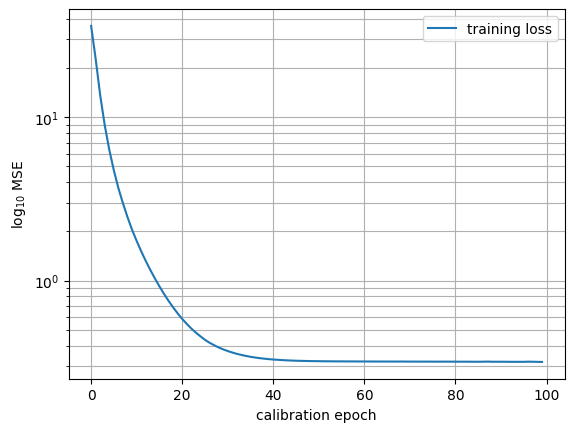

In [3]:
#   units: number of nodes in each hidden layer
units = [32,32,1]

#   acts: activation function in each hidden layer
activation = ['softplus','softplus','linear']

#   non_neg: restrict the weights in different layers to be non-negative
non_neg = [False, True, True]

#   data: 'bathtub', 'curve', 'double_curve
data = 'curve'

#   epochs: number of iterations in the optimisation process
epochs = 100

 #   load model

model = lm.main(units=units, activation=activation, non_neg=non_neg)

#   load data

xs, ys, xs_c, ys_c = ld.get_data(data)


#   calibrate model

t1 = now()
print(t1)

tf.keras.backend.set_value(model.optimizer.learning_rate, 0.002)
h = model.fit([xs_c], [ys_c], epochs = epochs,  verbose = 2)

t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')

lp.plot_loss(h)

# Evaluate model

16/16 [==============================] - 0s 2ms/step


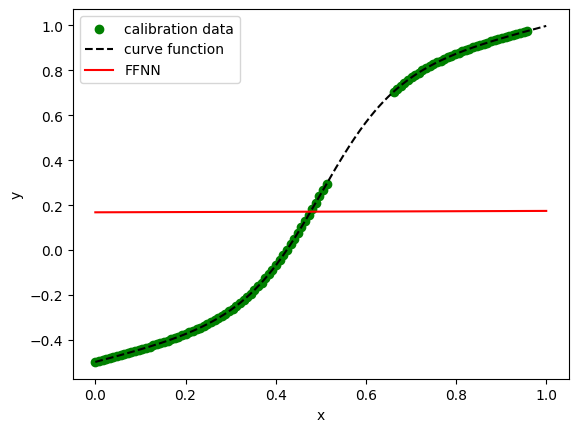

In [4]:
lp.plot_data_model(xs, ys, xs_c, ys_c, model, data, 4)